<a href="https://www.kaggle.com/code/lalit7881/brain-mri-radiomics-dataset?scriptVersionId=292607156" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-mri-radiomics-style-numerical-dataset/brain_mri_rich_features.csv
/kaggle/input/brain-mri-radiomics-style-numerical-dataset/README.txt
/kaggle/input/brain-mri-radiomics-style-numerical-dataset/feature_description.csv


## Title:
Brain MRI Radiomics Dataset

## Description:
This dataset contains radiomics-style numerical features extracted from brain Magnetic Resonance Imaging (MRI) scans. Radiomics converts medical images into a large set of quantitative features that capture tumor intensity, shape, texture, and spatial patterns, enabling advanced statistical analysis and machine learning applications.

The dataset is structured in tabular (numerical) format, where each row represents a single MRI scan or region of interest (ROI), and each column corresponds to a specific radiomic feature. These features may include first-order statistics (e.g., mean intensity, variance, skewness), shape-based metrics (e.g., volume, surface area, compactness), and texture features derived from matrices such as GLCM, GLRLM, GLSZM, and NGTDM.

This dataset is suitable for tasks such as brain tumor classification, disease progression analysis, outcome prediction, and feature selection experiments. It can be directly used with machine learning and deep learning models without requiring raw MRI images, making it ideal for rapid prototyping, academic research, and educational purposes in medical imaging and healthcare analytics.

The dataset supports reproducible research in radiomics, clinical decision support system development, and explainable AI studies focused on neuroimaging data.

## Import dataset

In [2]:
path = "/kaggle/input/brain-mri-radiomics-style-numerical-dataset/brain_mri_rich_features.csv"
df = pd.read_csv(path)

df.head()
df.shape
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7023 entries, 0 to 7022
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   mean           7023 non-null   float64
 1   std            7023 non-null   float64
 2   min            7023 non-null   float64
 3   max            7023 non-null   float64
 4   median         7023 non-null   float64
 5   contrast       7023 non-null   float64
 6   energy         7023 non-null   float64
 7   homogeneity    7023 non-null   float64
 8   correlation    7023 non-null   float64
 9   fft_mean       7023 non-null   float64
 10  fft_std        7023 non-null   float64
 11  fft_energy     7023 non-null   float64
 12  fft_max        7023 non-null   float64
 13  edge_density   7023 non-null   float64
 14  edge_count     7023 non-null   int64  
 15  edge_strength  7023 non-null   int64  
 16  lbp_0          7023 non-null   float64
 17  lbp_1          7023 non-null   float64
 18  lbp_2   

mean             0
std              0
min              0
max              0
median           0
contrast         0
energy           0
homogeneity      0
correlation      0
fft_mean         0
fft_std          0
fft_energy       0
fft_max          0
edge_density     0
edge_count       0
edge_strength    0
lbp_0            0
lbp_1            0
lbp_2            0
lbp_3            0
lbp_4            0
lbp_5            0
lbp_6            0
lbp_7            0
lbp_8            0
lbp_9            0
label            0
image            0
dtype: int64

In [3]:
df.describe()

,mean,std,min,max,median,contrast,energy,homogeneity,correlation,fft_mean,...,lbp_0,lbp_1,lbp_2,lbp_3,lbp_4,lbp_5,lbp_6,lbp_7,lbp_8,lbp_9
count,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,...,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000,7023.000000
mean,0.186971,0.184196,0.001211,0.960798,0.129487,209.908589,0.198387,0.456123,0.957013,12.246410,...,0.030320,0.051418,0.035585,0.086076,0.156484,0.129232,0.056582,0.058953,0.312998,0.082351
std,0.070412,0.050411,0.008413,0.046895,0.111211,254.647496,0.122880,0.129031,0.027100,4.569411,...,0.013125,0.016010,0.011203,0.021705,0.049194,0.030136,0.015380,0.015930,0.149542,0.029030
min,0.038181,0.081368,0.000000,0.490196,0.000000,16.177405,0.013413,0.071965,0.717872,3.966298,...,0.005508,0.013397,0.008545,0.017593,0.041885,0.032196,0.012894,0.014023,0.044754,0.017776
25%,0.138115,0.152597,0.000000,0.945098,0.023529,107.671262,0.091481,0.354161,0.950107,9.866800,...,0.021255,0.039352,0.027130,0.069809,0.122841,0.110268,0.044174,0.046799,0.182663,0.061897
50%,0.174993,0.171144,0.000000,0.968627,0.117647,139.957843,0.187020,0.457413,0.961537,11.187175,...,0.027313,0.048401,0.034317,0.087982,0.151489,0.129456,0.055771,0.057388,0.303040,0.076248
75%,0.214995,0.197370,0.000000,0.992157,0.207843,190.263894,0.282673,0.552252,0.970792,12.690035,...,0.037125,0.062210,0.043266,0.101799,0.180038,0.149292,0.070404,0.071213,0.426407,0.100121
max,0.539800,0.390955,0.156863,1.000000,0.623529,2630.967800,0.799633,0.828203,0.996215,41.061932,...,0.123917,0.124237,0.075150,0.168503,0.392731,0.241562,0.097946,0.120590,0.803360,0.223480


In [4]:
df.columns

Index(['mean', 'std', 'min', 'max', 'median', 'contrast', 'energy',
       'homogeneity', 'correlation', 'fft_mean', 'fft_std', 'fft_energy',
       'fft_max', 'edge_density', 'edge_count', 'edge_strength', 'lbp_0',
       'lbp_1', 'lbp_2', 'lbp_3', 'lbp_4', 'lbp_5', 'lbp_6', 'lbp_7', 'lbp_8',
       'lbp_9', 'label', 'image'],
      dtype='object')

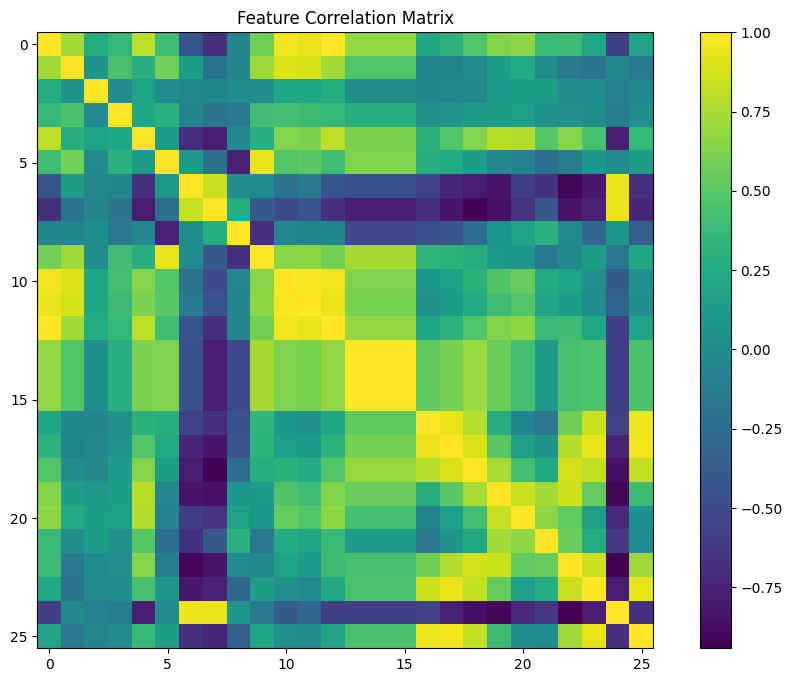

In [5]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
plt.imshow(corr)
plt.colorbar()
plt.title("Feature Correlation Matrix")
plt.show()

In [6]:
X = df.drop(columns=["label", "image"])
y = df["label"]

In [7]:
missing = X.isna().sum()
print(missing[missing > 0])

X = X.fillna(X.mean())

Series([], dtype: int64)


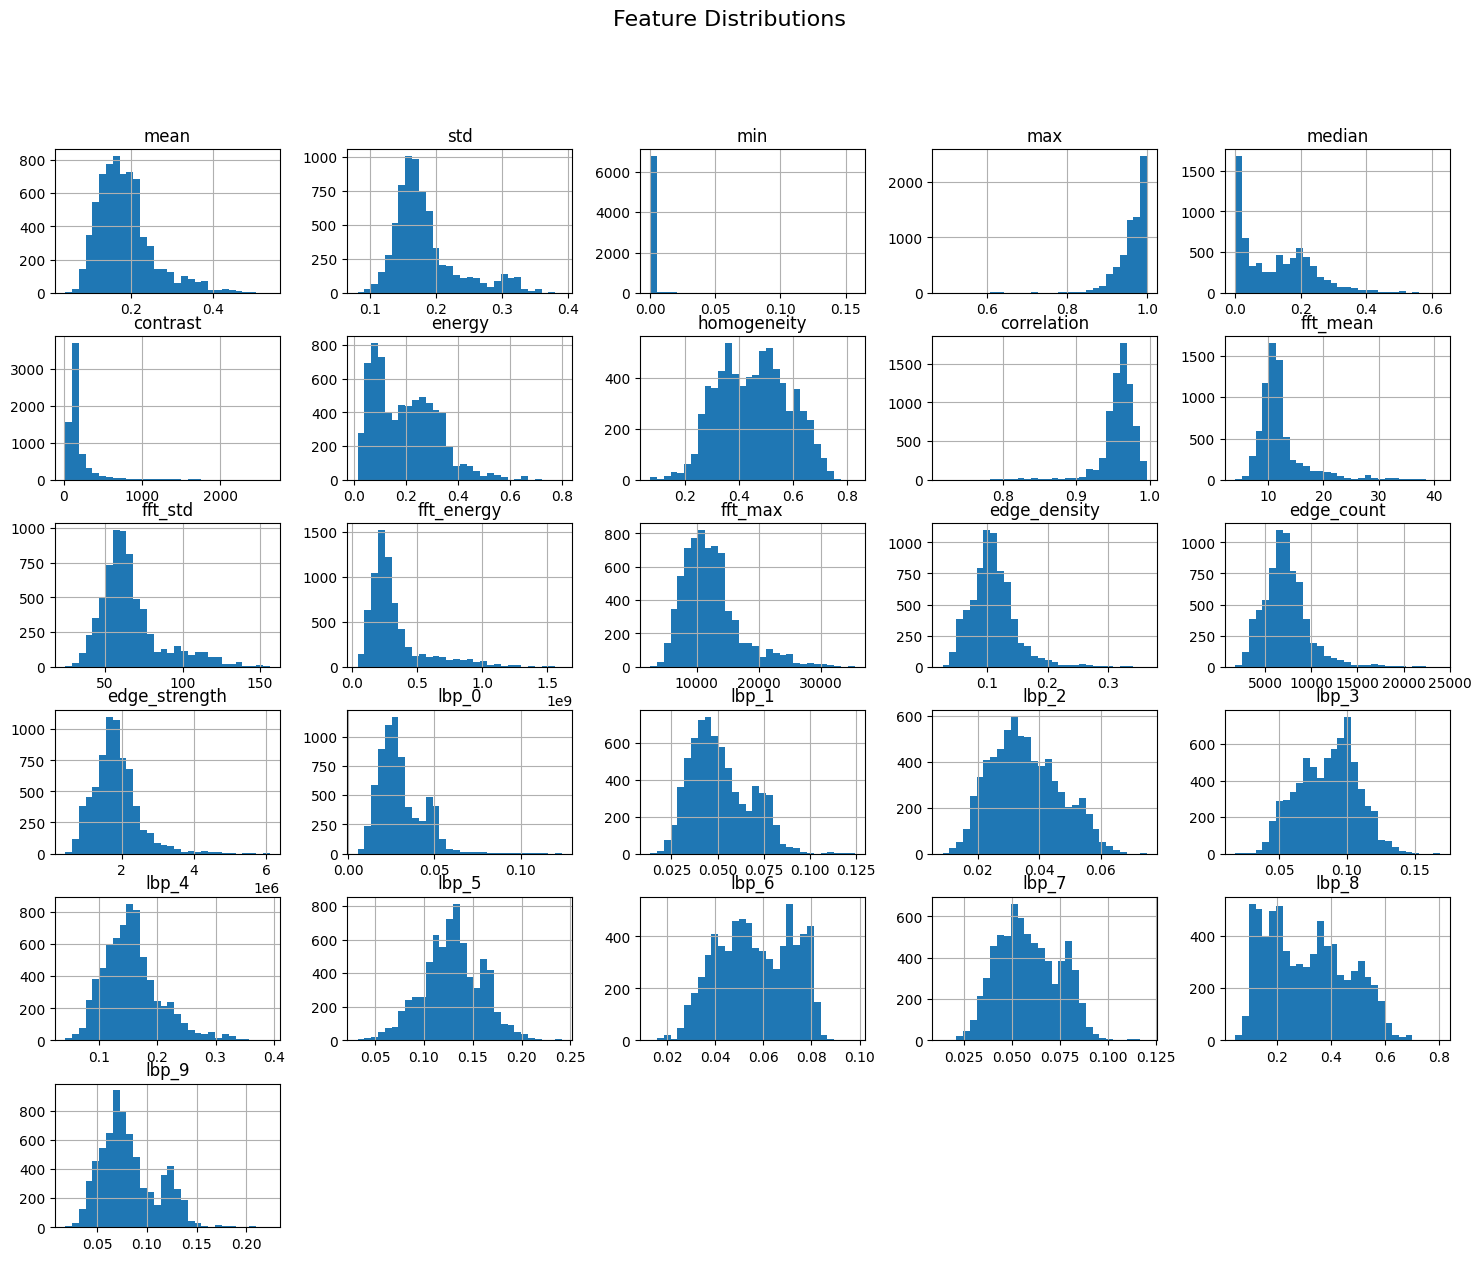

In [8]:
X.hist(figsize=(18, 14), bins=30)
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

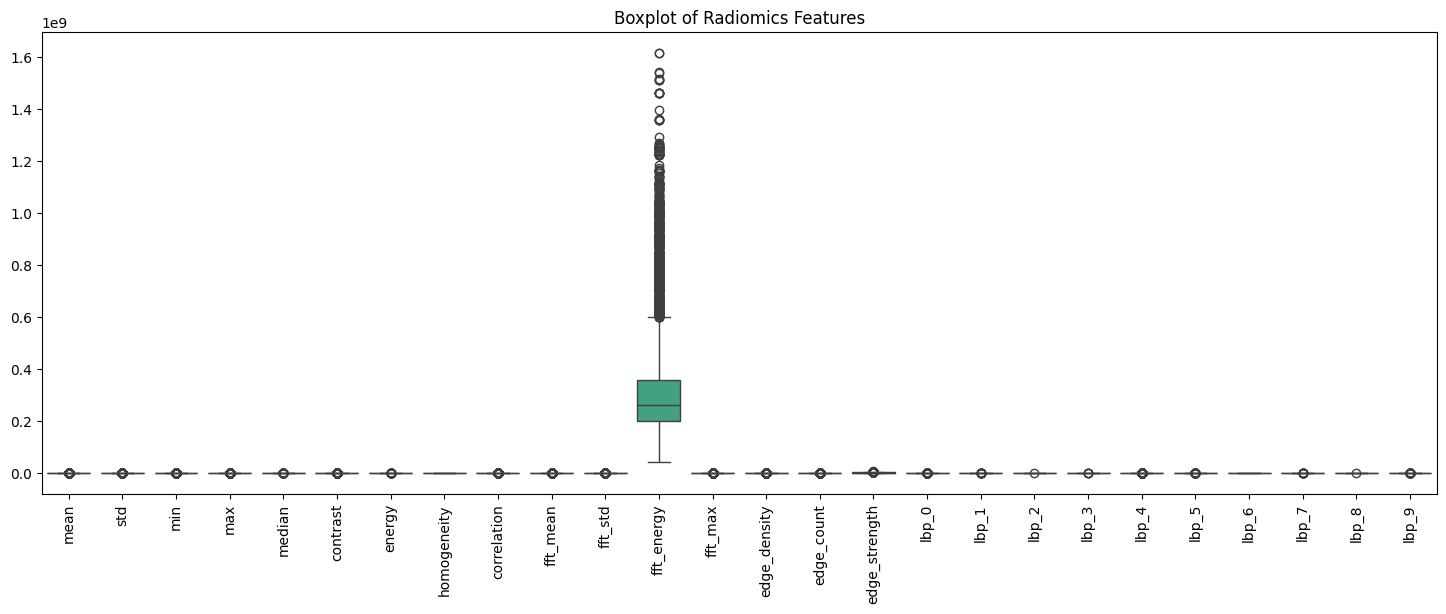

In [9]:
plt.figure(figsize=(18,6))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title("Boxplot of Radiomics Features")
plt.show()

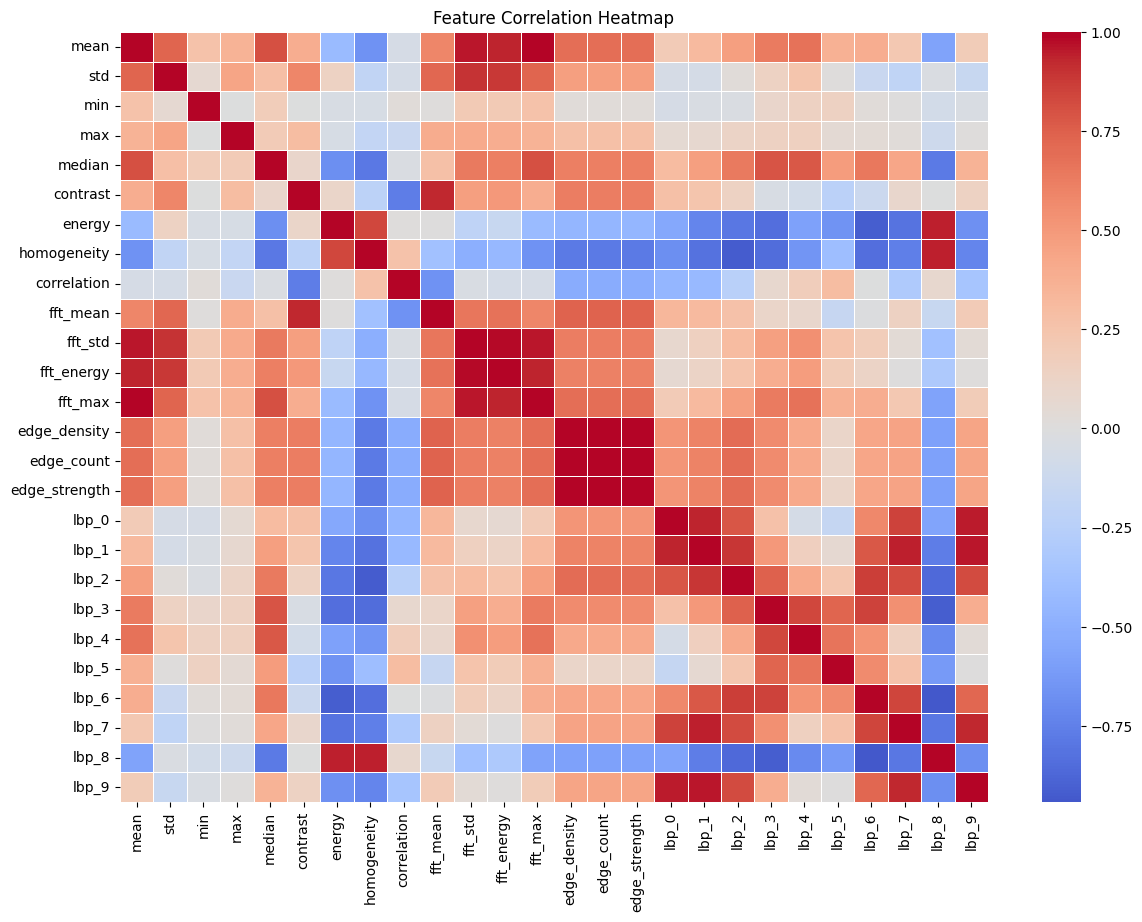

In [10]:
corr = X.corr()

plt.figure(figsize=(14,10))
sns.heatmap(corr, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

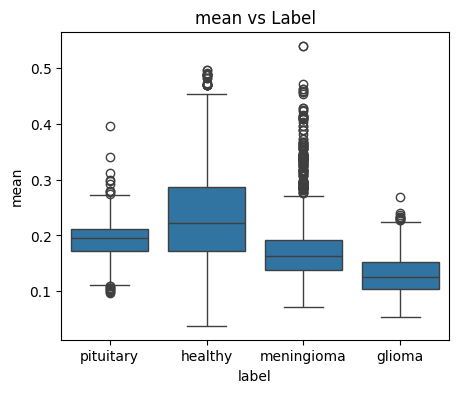

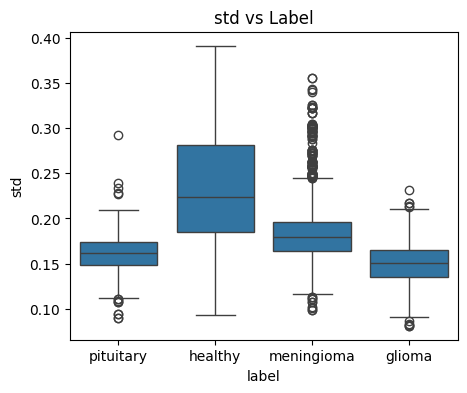

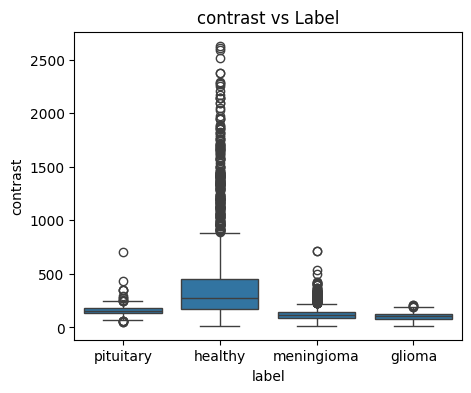

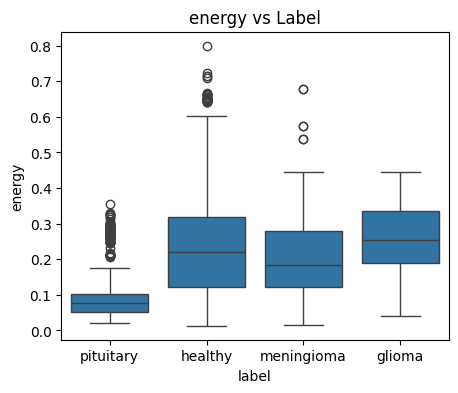

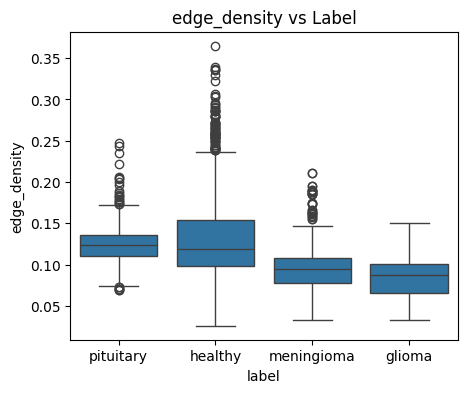

In [11]:
top_features = ["mean", "std", "contrast", "energy", "edge_density"]

for col in top_features:
    plt.figure(figsize=(5,4))
    sns.boxplot(x=y, y=X[col])
    plt.title(f"{col} vs Label")
    plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

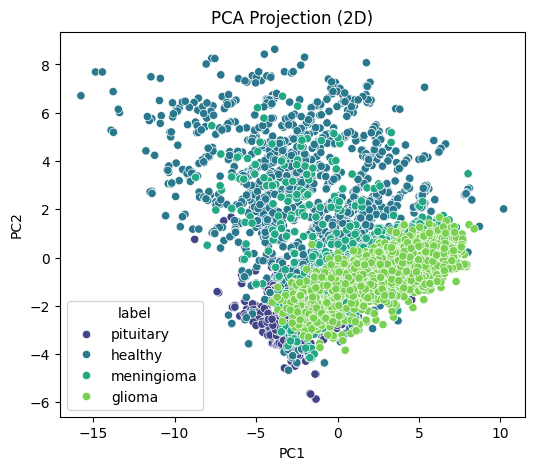

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(6,5))
sns.scatterplot(
    x=X_pca[:,0],
    y=X_pca[:,1],
    hue=y,
    palette="viridis"
)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    class_weight="balanced"
)
model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

In [16]:
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.9316725978647686
              precision    recall  f1-score   support

      glioma       0.95      0.86      0.90       324
     healthy       0.95      0.99      0.97       400
  meningioma       0.85      0.91      0.88       329
   pituitary       0.97      0.96      0.96       352

    accuracy                           0.93      1405
   macro avg       0.93      0.93      0.93      1405
weighted avg       0.93      0.93      0.93      1405



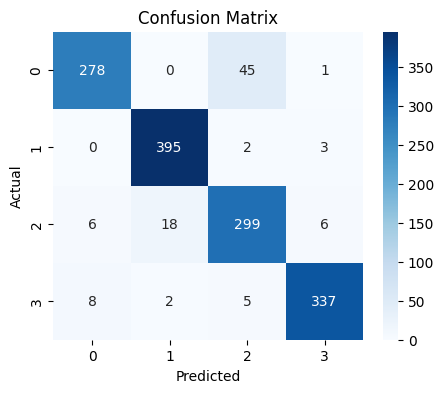

In [17]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

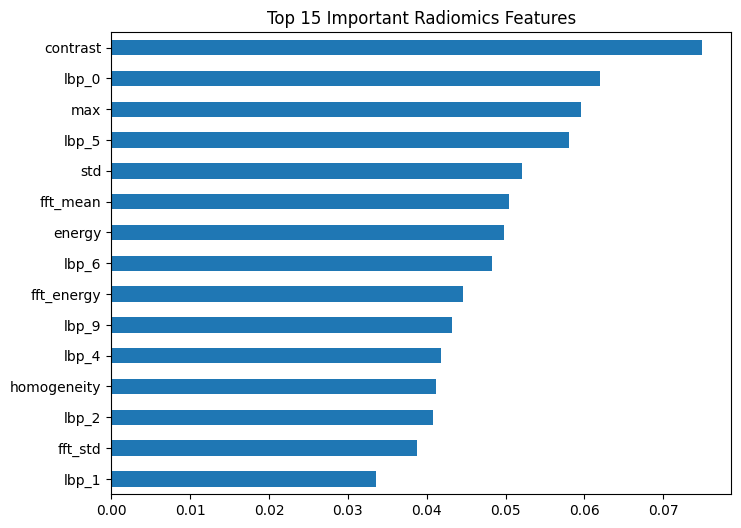

In [18]:
feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

plt.figure(figsize=(8,6))
feature_importance.head(15).plot(kind="barh")
plt.gca().invert_yaxis()
plt.title("Top 15 Important Radiomics Features")
plt.show()


In [19]:
from sklearn.preprocessing import label_binarize

classes = y.unique()
y_test_bin = label_binarize(y_test, classes=classes)


In [20]:
y_prob = model.predict_proba(X_test)

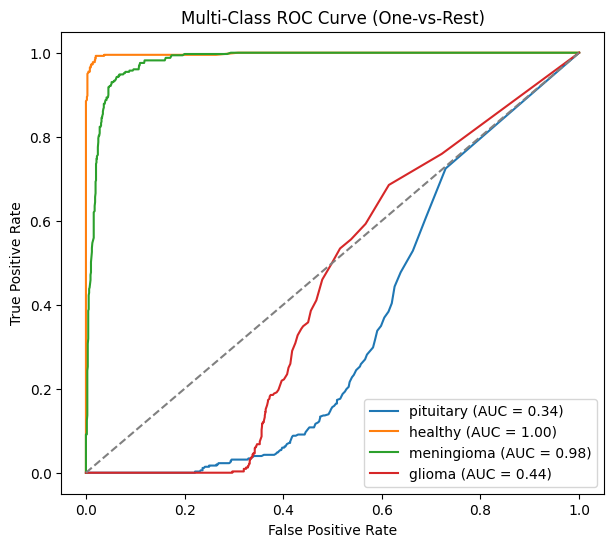

In [21]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(7,6))

for i, class_name in enumerate(classes):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{class_name} (AUC = {roc_auc:.2f})")

plt.plot([0,1], [0,1], linestyle="--", color="gray")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multi-Class ROC Curve (One-vs-Rest)")
plt.legend()
plt.show()


In [22]:
print("Pipeline Completed Successfully")
print("EDA → Visualization → Modeling → Evaluation Done")

Pipeline Completed Successfully
EDA → Visualization → Modeling → Evaluation Done


## Thank you..pls upvotee!!!!!